<a href="https://colab.research.google.com/github/brianosmith/EXSY_fitting_notebook/blob/master/NKMP_K_binding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Saturation curves fitting for NKMP K+ interaction

Goal is to produce a tool to calculate the fit of fluorescence data from NKMP binding to K+.

Expression to fit is

$
Q = (Q_{max} - Q_0)Y + Q_0
$

Where $Q$ is the fluoresence, $Q_{max}$ and $Q_0$ are the maximum and mimimum fluorescence yields and Y is

$
Y = \frac{([M_{tot}] + [L_{tot}] + K_d) \pm \sqrt{([M_{tot}] + [L_{tot}] + K_d)^2 - 4[M_{tot}][L_{tot}]} }{ 2[M_{tot}]}
$

in which $M$ represents the fixed concentration component (usually the macromolecule) and $L$ the varying concentration component (usually the ligand) and $K_d$ is the dissociation constant.

In [2]:
# sqrt is in the math package and has to be imported
from math import sqrt

# some values to calculate with
M = 0.5
Kd = 0.15
L = 0.125

# careful placement of brackets required to get the correct evaluation order
# x**y to raise a value to a power

Y = ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)

print(Y)

0.1828640358836494


In [4]:
#include response range
Qmax = 1.0e5
Q0 = 0.3e2

Q = (Qmax - Q0)*Y + Q0

print(Q)

18310.91766728843


Lookup: [L], Y, Q ... [[0.1, 0.26794919243112253, 26816.88076733932], [0.19, 0.4245370899470907, 42470.97288201066], [0.28, 0.5314561435345977, 53159.67066915373], [0.37, 0.6072823696195045, 60740.01849086187], [0.45999999999999996, 0.6631225717283756, 66322.36349568571], [0.5499999999999999, 0.7056382803105438, 70572.65888264506], [0.64, 0.7389395359323281, 73901.78540715484], [0.73, 0.7656528422124237, 76572.314635976], [0.82, 0.7875162337936142, 78757.99789234762], [0.9099999999999999, 0.8057173989190858, 80577.568369941], [1.0, 0.8210916541997271, 82114.53267034671]]


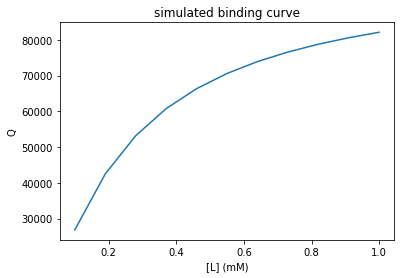

In [5]:
# for drawing the graph
%matplotlib inline
import matplotlib.pyplot as plt
# math function as above
from math import sqrt
# for creating the L values over which to sample the function. Would also be nice to capture the results in a more sophisticated array.
import numpy as np

M = 0.1
Kd = 0.2

Qmax = 1.0e5
Q0 = 0.3e2

Llow = 0.1
Lhigh = 1.0
nL = 11

Lval = np.linspace(Llow, Lhigh, nL)

Yval = []
Qval = []
Lookup = [] # could be np.array()
for L in Lval:
  Y = ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)
  Yval.append(Y)
  Q = (Qmax - Q0)*Y + Q0
  Qval.append(Q)
  Lookup.append([L,Y,Q])

# crude numerical output - should be formatted better
print("Lookup: [L], Y, Q ...", Lookup)

#plot the results
plt.title("simulated binding curve")
plt.xlabel('[L] (mM)')
plt.ylabel('Q')
plt.plot(Lval,Qval, label='Q')
#plt.legend()



# Simulated response curve for a titration
In the case that a titration is performed experimentally, it is often the case that the sample is constructed with one partner (often the protein) alone and the other partner (often a small molecule) is increased in concentration by successive addition of material from a concentrated stock solution. In this case, the total volume of the sample will increase with the consequence that the concentration of the initial partner is not constant. Unless the change in volume is very small, this should be accounted for to get be able to fit the data accurately.

Where the availability of material is not limiting, it is good practice to construct a series of samples with the non-varied partner always present at the same concentration.

Alternatively, where the availability of material is limiting, it is good practice to start with two samples of equal volume containing equal concentrations of the non-varied partner and concentrations of the varied partner at the extremes of the range to be explored. Intermediate points are then constructed by successively exchanging volumes between the two samples. The concentration of the non-varied partner is this kept constant.

This notebook deals with the second case, where a separate sample is assembled for each point in the titration and the macromolecule concentration is held constant.



Lookup: [L], Y... [[0.001, 0.0033259341654726104], [0.01099, 0.035749716133517684], [0.020980000000000002, 0.06675045915554761], [0.030970000000000004, 0.09638007006872285], [0.04096, 0.12469144676702681], [0.05095, 0.15173797181680493], [0.06094000000000001, 0.17757305658101769], [0.07093, 0.20224973901599747], [0.08092, 0.2258203360774233], [0.09091, 0.2483361498334974], [0.1009, 0.2698472249467332], [0.11089, 0.2904021541352683], [0.12088000000000002, 0.3100479275236981], [0.13087000000000001, 0.3288298213933652], [0.14086, 0.3467913216891827], [0.15085, 0.36397407768072126], [0.16084, 0.38041788135974197], [0.17083, 0.39616066844070874], [0.18082, 0.4112385371782615], [0.19081, 0.42568578159641157], [0.2008, 0.43953493611541106], [0.21079, 0.4528168289468179], [0.22078, 0.4655606419934183], [0.23077, 0.4777939753305982], [0.24076000000000003, 0.48954291465512056], [0.25075000000000003, 0.5008321003640633], [0.26074, 0.511684797170839], [0.27073, 0.522122963377864], [0.28072, 0.5321

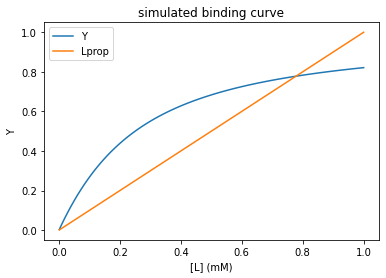

In [7]:
# for drawing the graph
%matplotlib inline
import matplotlib.pyplot as plt
# math function as above
from math import sqrt
# for creating the L values over which to sample the function. Would also be nice to capture the results in a more sophisticated array.
import numpy as np

M = 0.1
Kd = 0.2

Ls = 10.0
Llow = 0.001
Lhigh = 1.0
nL = 101

Lval = np.linspace(Llow, Lhigh, nL)

Yval = []
Lprop = []
Lookup = [] # could be np.array()
for L in Lval:
  Y = ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)
  Yval.append(Y)
  Lprop.append(L/Lhigh)
  Lookup.append([L,Y])

# crude numerical output - should be formatted better
print("Lookup: [L], Y...", Lookup)

#plot the results
plt.title("simulated binding curve")
plt.xlabel('[L] (mM)')
plt.ylabel('Y')
plt.plot(Lval,Yval, label='Y')
plt.plot(Lval,Lprop, label='Lprop')
plt.legend()



In [ ]:
def fracSat(Lvals, Kd, M0):
  # Function to simulate titrated saturation curve with fixed volume
  # Lvals is an array of deliberately varied component concentrations used
  # M is the concentration of the non-varied component
  # Kd is the Kd (supply an initial estimate for fitting)
  # returns an array of fractional saturation values

  Ys = []
  for L in Lvals:
    Y = ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)
    Ys.append(Y)
    
  Ys = np.array(Ys)
  return Ys

def makeResponseTitrated(Mzero):
  # Allows a case specific responseTitrated() to be defined for curve_fit since
  # can't pass "fixed" args with args=()
  # If Q0 is known (a common case) adjust these defs to shift it
  def responseTitrated(Lvals, Kd, Qmax, Q0):
    # Function to wrap fracSatTitrated within an arbitrary response scale
    # Q0 and Qmax are the limits of the response and can be left unconstrained for fitting
    # Pass sensible guesses for Kd, Qmax & Q0 with p0=[] when using scipy.optimize
    # returns an array of response values
    M = Mzero

    Ys = fracSat(Lvals, Kd, M)
    Qs = ((Qmax-Q0)*Ys) + Q0
    
    return Qs

  return responseTitrated

# fit using scipy.optimize.curve_fit
M0 = 1.0e-6 # known non-varied (NKMP) conc 
Kd0 = 1.0e-6; Qmax0 = 200; Q00 = 0 # initial guesses for fitted params
nlfit, nlpcov = scipy.optimize.curve_fit(makeResponseTitrated(M0),
                datasets.protein, datasets.iLambda, p0=[Kd0, Qmax0, Q00])

fittedKd, fittedQmax, fittedQ0 = nlfit
dKd, dQmax, dQ0 = [np.sqrt(nlpcov[j,j]) for j in range(nlfit.size)]
print('fitted Kd: ', fittedKd,'+-',dKd)

#create fitted function
myResponseTitrated = makeResponseTitrated(M0)
fitiLs = myResponseTitrated(datasets.protein, fittedKd, fittedQmax, fittedQ0)

#add fitted values to last plot
plt.plot(datasets.protein, fitiLs)
ax4.text(0.05, 0.95, 'Kd = {0:0.3g}$\pm${1:0.3g}'
         .format(fittedKd, dKd), transform = ax4.transAxes)